### **Logistic Regression**

Extend the notebook by adding a new cell to train a Logistic Regression with L1 penalty. Use the following arguments:

solver='saga', tol=0.001, max_iter=500.

What do you observe by comparing the two images of the coefficients of L2 and L1?

In [ ]:
# adaptation after
# http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)

In [ ]:
# load the dataset
digits = datasets.load_digits()
X_raw_all = digits.data
y_raw_all = digits.target

# select only 3s and 8s
ind = (y_raw_all == 3) | (y_raw_all == 8)
X_raw = X_raw_all[ind,:]
y_raw = y_raw_all[ind]
n_samples, n_features = X_raw.shape

print('No. samples = ', n_samples)
print('No. features = ', n_features)

No. samples =  357
No. features =  64


## Some Data Exploration

[[ 0.  1. 10. 15. 11.  1.  0.  0.]
 [ 0.  3.  8.  8. 11. 12.  0.  0.]
 [ 0.  0.  0.  5. 14. 15.  1.  0.]
 [ 0.  0.  0. 11. 15.  2.  0.  0.]
 [ 0.  0.  0.  4. 15.  2.  0.  0.]
 [ 0.  0.  0.  0. 12. 10.  0.  0.]
 [ 0.  0.  3.  4. 10. 16.  1.  0.]
 [ 0.  0. 13. 16. 15. 10.  0.  0.]]


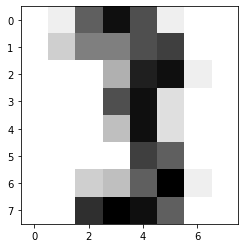

In [ ]:
# plot a single sample
show_sample_no = 10
plt.figure()
plt.imshow(X_raw[show_sample_no,:].reshape((8, 8)), cmap=plt.cm.binary, interpolation='none')
print(X_raw[show_sample_no,:].reshape((8, 8)))

Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

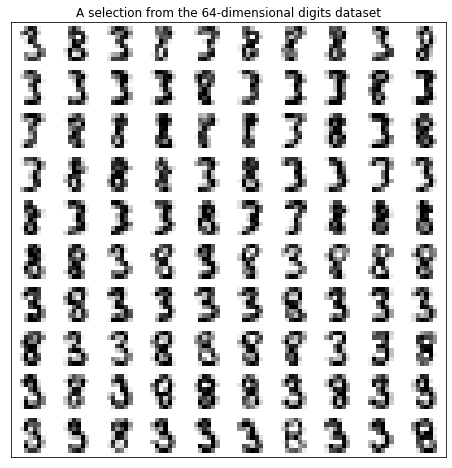

In [ ]:
# Plot images of the digits
n_img_per_row = 10
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X_raw[i * n_img_per_row + j].reshape((8, 8))

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure()
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

In [ ]:
# TODO: split the data randomly in 67% training and 33% testing
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.33, random_state=0)

In [ ]:
# TODO: scale the data -> zero mean and unit variance

# scale train dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# scale test dataset
X_test_scaled = scaler.transform(X_test)

## Logistic Regression - L2 with 10-fold cross-validation

1/alpha =  [0.00497702]
coef =  [[ 0.         -0.03977015 -0.03925356 -0.05512758 -0.05892729 -0.02383029
  -0.02520766 -0.01994643  0.00935319 -0.03912972  0.0063074   0.02668758
  -0.03516287  0.00892738 -0.00330952 -0.01407337  0.00913041  0.02644348
   0.11677199  0.0714718  -0.05283371  0.04187341  0.0300237   0.
   0.          0.0229108   0.10523448  0.08217799 -0.0080488   0.03600598
   0.03019328  0.          0.          0.01653235  0.0739978   0.09363673
   0.03143373 -0.05313125 -0.05633888  0.          0.          0.02234498
   0.11868324  0.10811335  0.03211536 -0.03139982 -0.06040786  0.
   0.         -0.00192329  0.06487144  0.04239482 -0.02519543 -0.03714149
  -0.04971236 -0.01843668  0.         -0.02651693 -0.05474711 -0.03984526
  -0.00989216 -0.02143623 -0.0121979  -0.01142658]]
accuracy =  0.9830508474576272


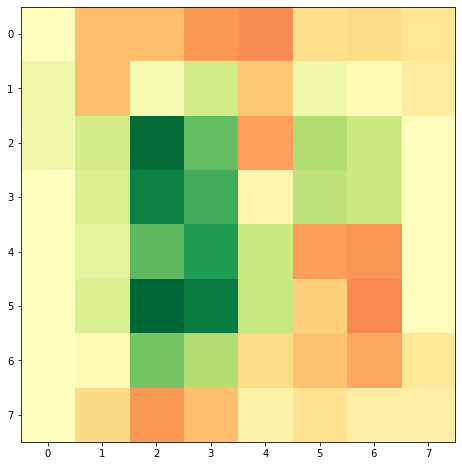

In [ ]:
# train logistic regression & cross validation
clf_L2 = LogisticRegressionCV(Cs=100, cv=10, penalty='l2', random_state=0, multi_class='multinomial', solver='lbfgs', n_jobs=-1)
clf_L2.fit(X_train_scaled, y_train)
print('1/alpha = ', clf_L2.C_)
print('coef = ', clf_L2.coef_)
print('accuracy = ', clf_L2.score(X_test_scaled,y_test))

# Heatmap coefficients
img_coef = clf_L2.coef_.reshape((8,8))
plt.figure()
tmp_max = np.max(np.abs([np.min(clf_L2.coef_), np.max(clf_L2.coef_)]))
plt.imshow(img_coef, cmap=plt.cm.RdYlGn,  vmin=-tmp_max, vmax=tmp_max, interpolation='none')

In [ ]:
# TODO: predict the class probabilities for the testing dataset using L1 model
#       and show them along the actual test classes

# suppress the scientific notation for small floats and use only 2 digits of precision
np.set_printoptions(precision=2,suppress=True)

print('p(0), p(1), actual = \n', np.hstack([clf_L2.predict_proba(X_test_scaled), y_test.reshape(-1,1)])[:10,:])

p(0), p(1), actual = 
 [[0.14 0.86 8.  ]
 [0.95 0.05 3.  ]
 [0.87 0.13 3.  ]
 [0.31 0.69 8.  ]
 [0.65 0.35 3.  ]
 [0.35 0.65 8.  ]
 [0.82 0.18 3.  ]
 [0.87 0.13 3.  ]
 [0.94 0.06 3.  ]
 [0.94 0.06 3.  ]]


**Adding a new cell to train a Logistic Regression with L1 penalty. Use the following arguments:**

**solver='saga', tol=0.001, max_iter=500**

coef =  [[ 0.   -0.21  0.   -0.4  -0.58  0.   -0.16 -0.08  0.08 -0.28 -0.15 -0.1
  -0.5   0.   -0.05  0.    0.05  0.    1.35  0.69 -0.24  0.17  0.02  0.
   0.   -0.03  1.19  0.88  0.    0.22  0.04  0.    0.    0.06  0.26  0.37
   0.41  0.   -0.44  0.    0.    0.05  1.8   1.32  0.   -0.03 -0.12  0.
   0.   -0.03  0.41  0.21 -0.29 -0.4  -0.64  0.    0.   -0.11 -0.34 -0.09
   0.   -0.01 -0.17  0.  ]]
accuracy =  1.0


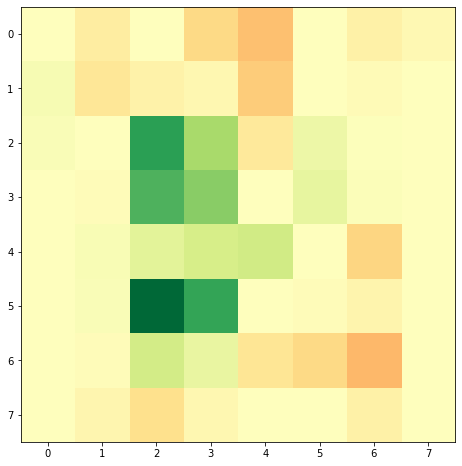

In [ ]:
# train logistic regression & cross validation
clf_L1 = LogisticRegressionCV(penalty='l1', solver='saga', tol=0.001, max_iter=500)
clf_L1.fit(X_train_scaled, y_train)
print('coef = ', clf_L1.coef_)
print('accuracy = ', clf_L1.score(X_test_scaled, y_test))

# Heatmap coefficients
img_coef = clf_L1.coef_.reshape((8,8))
plt.figure()
tmp_max = np.max(np.abs([np.min(clf_L1.coef_), np.max(clf_L1.coef_)]))
plt.imshow(img_coef, cmap=plt.cm.RdYlGn,  vmin=-tmp_max, vmax=tmp_max, interpolation='none')

In [ ]:
# TODO: predict the class probabilities for the testing dataset using L1 model
#       and show them along the actual test classes

# suppress the scientific notation for small floats and use only 2 digits of precision
np.set_printoptions(precision=2,suppress=True)

print('p(0), p(1), actual = \n', np.hstack([clf_L1.predict_proba(X_test_scaled), y_test.reshape(-1,1)])[:10,:])

p(0), p(1), actual = 
 [[0.   1.   8.  ]
 [1.   0.   3.  ]
 [1.   0.   3.  ]
 [0.01 0.99 8.  ]
 [0.61 0.39 3.  ]
 [0.06 0.94 8.  ]
 [1.   0.   3.  ]
 [1.   0.   3.  ]
 [1.   0.   3.  ]
 [1.   0.   3.  ]]


### **What do you observe by comparing the two images of the coefficients of L2 and L1?**

**Answer:**
We can see that the L1 regularization produces a smaller sample size model than the L2 regularization by contrasting the two images of the coefficients of L2 and L1.

This is because L1 regularization encourages the coefficients of some features to become exactly zero, and effectively performs feature selection, while L2 regularization only shrinks the coefficients towards zero without necessarily making them zero.

We can observe that the L1-regularized model in the digit classification problem has just a few nonzero coefficients, whereas the L2-regularized model has coefficients with both positive and negative values spread throughout the image.
